In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from pyACC.clustering import generate_gaussian_map,poisson_sample_map,count_pairs

import camb
from scipy.spatial import cKDTree

from scipy.interpolate import interp1d

In [2]:
Omega_b=0.05
Omega_c=0.25

h=0.7
As=2.1e-9
ns=0.96

pars=camb.CAMBparams()
pars.set_cosmology(H0=100*h,ombh2=Omega_b*h**2,omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As,ns=ns)

pars.set_matter_power(redshifts=[10.],kmax=100.)
results=camb.get_results(pars)

kh,z,pk=results.get_matter_power_spectrum(minkh=1e-4,maxkh=100,npoints=1000)

In [3]:
#Power spectrum interpolator
pk_func=interp1d(kh,pk[0],fill_value='extrapolate',kind='cubic')

#Box
side=500 #Mpc/h
spacing=5 #Mpc/h

delta_k,delta_x=generate_gaussian_map(pk_func,side,spacing)

In [4]:
Nobjects=200000
catalog=poisson_sample_map(delta_x,side,spacing,Nobjects)

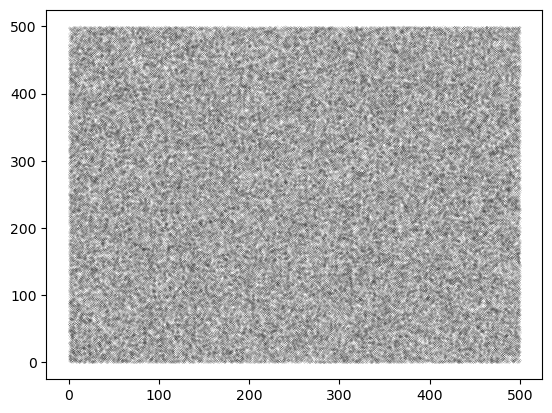

In [5]:
plt.plot(catalog[:,0],catalog[:,2],'k.',markersize=0.1)

### Count Pairs

In [6]:
r_edges=np.linspace(0,50,11)
r_bins=0.5*(r_edges[1:]+r_edges[:-1])

DD=count_pairs(catalog,r_edges)

100%|██████████| 199890/199890 [00:32<00:00, 6109.49it/s] 


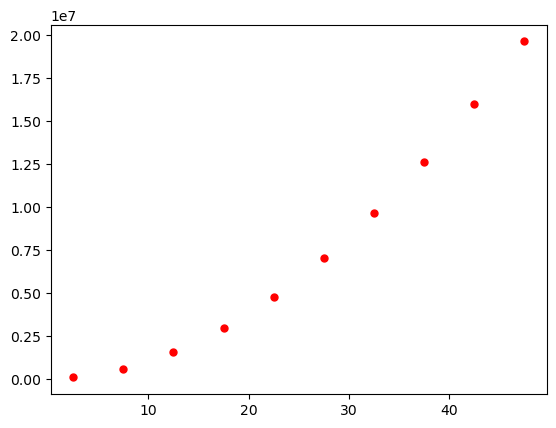

In [7]:
plt.plot(r_bins,DD,'r.',markersize=10)

In [8]:
random_sample=np.random.uniform(0,side,(Nobjects,3))
RR=count_pairs(random_sample,r_edges)

100%|██████████| 200000/200000 [00:26<00:00, 7422.41it/s]


In [9]:
DR=count_pairs(catalog,r_edges,random_sample)

100%|██████████| 199890/199890 [00:32<00:00, 6163.03it/s]


### Normalize pair counts

In [10]:
norm_DD=DD/(len(catalog)*(len(catalog)-1)/2) #because this is a self-pair count
norm_RR=RR/(len(random_sample)*(len(random_sample)-1)/2) #because this is a self-pair count
norm_DR=DR/(len(catalog)*len(random_sample)) #because this is a cross-pair count

Text(0, 0.5, '$\\xi_{LS}$')

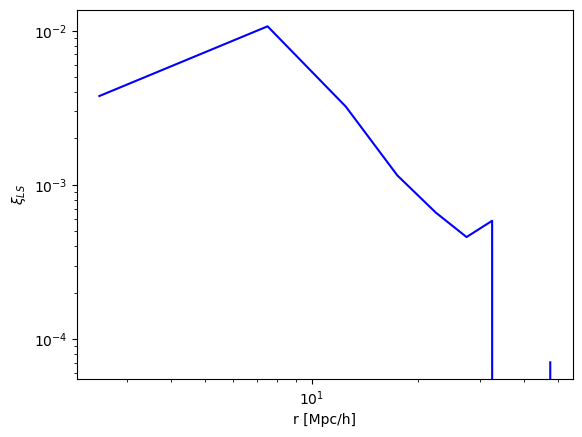

In [11]:
xi_LS=(norm_DD-2*norm_DR+norm_RR)/norm_RR
plt.loglog(r_bins,xi_LS,'b-')
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_{LS}$')